In [1]:
%matplotlib inline
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from google.colab import files

## some config
lw = 4.0              ## plot linewidth
figuresize = [20,12]  ## size of the plots

In [24]:
import re
def read_perftest_output(filename):
    buffer=""
    with open(filename,'r') as f:
        filetext = f.read()

    # https://regex101.com/r/4NShAc/2
    regex = r"(?<=--\n)( #bytes.*)(?=\n--)"
    matches = re.search(regex, filetext, re.DOTALL)
    if matches:
        for line in matches.group(0).splitlines():
            if line.startswith(" #bytes"):
                buffer+= ",".join(line.replace("BW","").replace("[Gb/sec]","").\
                                    replace("[Mpps]","").replace("#","").\
                                    replace("[usec]","").replace("percentile","").split()) + "\n"
            else:
                buffer+= ",".join(line.split()) + "\n"
            
    return buffer

## Bandwidth

In [ ]:
filename = files.upload()

In [73]:
df = pd.read_csv(StringIO(read_perftest_output(filename)))

In [29]:
df.tail(5)

,bytes,iterations,peak,average,MsgRate
18,524288,1000,96.59,96.58,0.023028
19,1048576,1000,96.59,96.59,0.011515
20,2097152,1000,96.60,96.59,0.005758
21,4194304,1000,96.60,96.60,0.002879
22,8388608,1000,96.60,96.60,0.001439


In [27]:
plt.rcParams['figure.figsize'] = figuresize

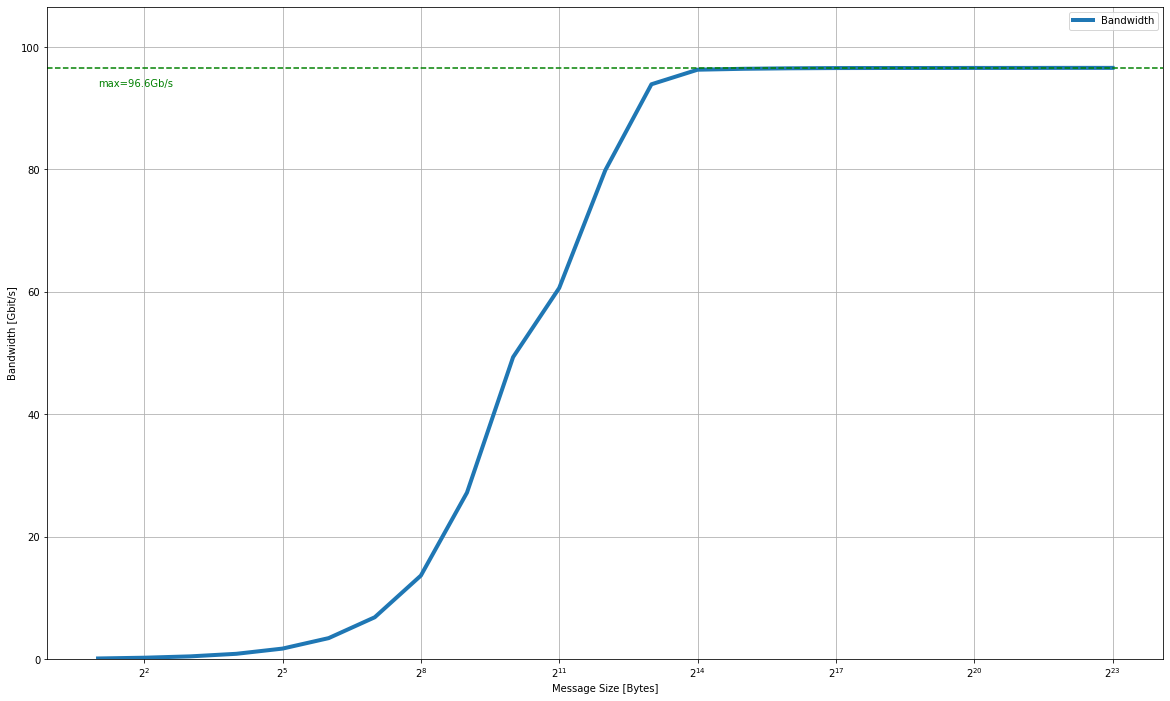

In [28]:
plt.grid(True)
plt.xscale('log', basex=2)
plt.yscale('linear')
plt.ylim(0, df.average.max()+10)
plt.xlabel('Message Size [Bytes]')
plt.ylabel('Bandwidth [Gbit/s]')

plt.plot(df.bytes,df.average,linewidth=lw, label="Bandwidth")

plt.axhline(y=df.average.max(),color="green", linestyle='dashed')
plt.text(2,df.average.max()-3, 'max='+str(df.average.max())+'Gb/s', color='green')
plt.legend()  

## Latency

In [ ]:
filename = files.upload()

In [30]:
df = pd.read_csv(StringIO(read_perftest_output(filename)))

In [31]:
df.tail(5)

,bytes,iterations,t_min,t_max,t_typical,t_avg,t_stdev,99%,99.9%
18,524288,1000,46.55,53.50,46.81,46.81,0.19,46.98,53.50
19,1048576,1000,89.93,90.40,90.21,90.21,0.09,90.36,90.40
20,2097152,1000,176.75,180.19,177.06,177.06,0.09,177.23,180.19
21,4194304,1000,350.46,351.02,350.73,350.72,0.09,350.89,351.02
22,8388608,1000,697.87,707.35,698.16,698.17,0.37,698.34,707.35


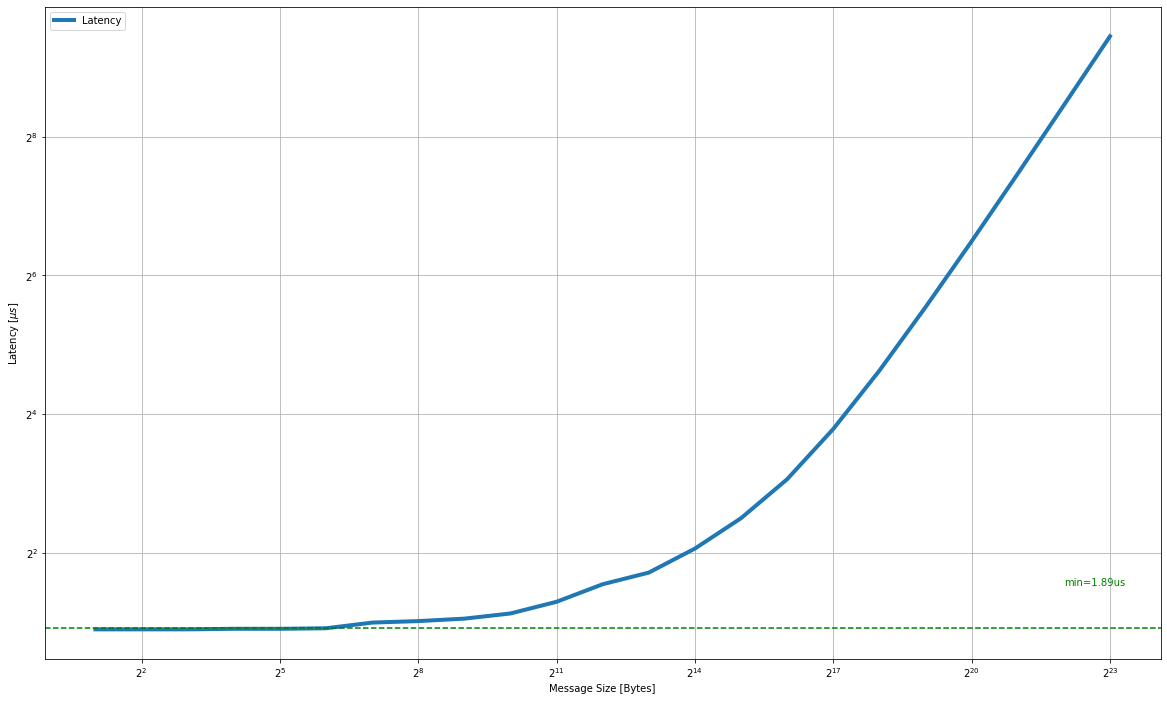

In [71]:
plt.grid(True)
plt.xscale('log', basex=2)
plt.yscale('log', basey=2)
plt.xlabel('Message Size [Bytes]')
plt.ylabel('Latency [$\mu s$]')
plt.grid(True, which="minor", linestyle='--')


plt.plot(df.bytes, df.t_min, linewidth=lw, label="Latency")

plt.axhline(y=df.t_avg.min(),color="green", linestyle='dashed')
plt.text(df.bytes.max()/2,df.t_avg.min()+1, 'min='+str(df.t_avg.min())+'us', color='green')
plt.legend(loc="upper left")
plt.minorticks_on()